In [7]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [12]:
capital = pd.read_csv("capital_budget.csv", encoding='unicode_escape')
capital.head()


,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Public Library,Research Collections Preservation and Storage ...,"A planning study for the storage, preservation...",Boston Public Library,Study Underway,Citywide,"200,000",-,-,-,...,-,-,"160,000","40,000",-,-,-,-,-,"200,000"
1,Boston Centers for Youth and Families,BCYF Clougherty Pool,"Make upgrades to the pool, pool deck, the bath...",Public Facilities Department,To Be Scheduled,Charlestown,"400,000",-,"2,300,000",-,...,"1,936",-,"250,000","2,448,064",-,-,-,-,-,"2,700,000"
2,Boston Public Schools,Window Repair and Replacement,Replace or make significant repairs to windows...,Boston Public Schools,Complete,Citywide,"5,111,005",-,"2,111,005",-,...,-,-,"500,000","6,722,010",-,-,-,-,-,"7,222,010"
3,Boston Centers for Youth and Families,Youth Budget Round 9,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,"1,000,000",-,-,-,...,-,-,-,"1,000,000",-,-,-,-,-,"1,000,000"
4,Boston Centers for Youth and Families,Youth Budget Round 8,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,"1,000,000",-,-,-,...,-,-,-,"1,000,000",-,-,-,-,-,"1,000,000"


Neighborhood              29
Department                 0
GO_Expended                0
External_Funds             0
GrantYear_25               0
 Grant_Year_1              0
Grant_Year_0               0
Grant_Expended             0
Capital_Year_25            0
 CapitalYear_1             0
Capital_Year_0             0
 Grant_Future              0
Project_Name               0
 Grant_FY                  0
 Grant_Existing            0
Authorization_Future       0
Authorization_FY           0
Authorization_Existing     0
Project_Status             0
PM_Department              0
Scope_Of_Work              0
Total_Project_Budget       0
dtype: int64


<AxesSubplot:>

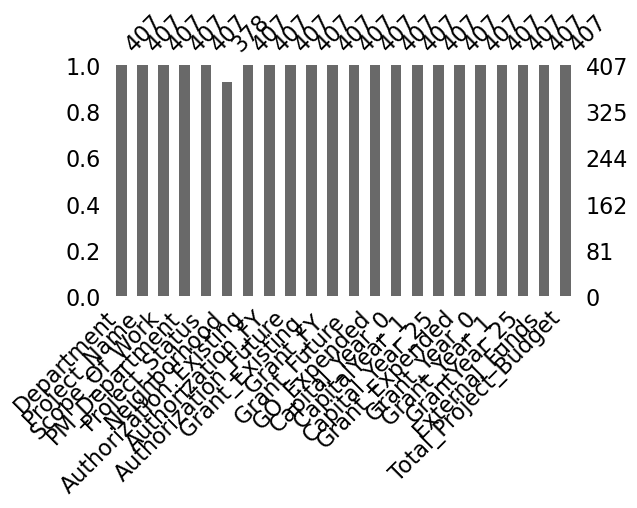

In [14]:
print(capital.isnull().sum().sort_values(ascending=False)) 
msno.bar(capital,figsize=(6,3)) # bar chart
#plt.show()

In [16]:
Useful_data = pd.DataFrame(capital, columns = [ 'Department', 'PM_Department', 'Project_Status', 'Neighborhood', 'Total_Project_Budget'])
Useful_data

,Department,PM_Department,Project_Status,Neighborhood,Total_Project_Budget
0,Boston Public Library,Boston Public Library,Study Underway,Citywide,"200,000"
1,Boston Centers for Youth and Families,Public Facilities Department,To Be Scheduled,Charlestown,"2,700,000"
2,Boston Public Schools,Boston Public Schools,Complete,Citywide,"7,222,010"
3,Boston Centers for Youth and Families,Youth Engagement and Employment,To Be Scheduled,Citywide,"1,000,000"
4,Boston Centers for Youth and Families,Youth Engagement and Employment,To Be Scheduled,Citywide,"1,000,000"
...,...,...,...,...,...
402,Public Works Department,Public Works Department,New Project,Chinatown,"500,000"
403,Parks and Recreation Department,Parks and Recreation Department,New Project,Dorchester,"100,000"
404,Office of Arts & Culture,Public Facilities Department,New Project,Dorchester,"125,000"
405,Public Works Department,Public Works Department,New Project,Dorchester,"200,000"


In [19]:
status = Useful_data.groupby(['Project_Status']).describe()
status

Department         \
                             count unique   
Project_Status                              
Annual Program                  46      8   
Complete                         1      1   
Implementation Underway         28     11   
In Construction                 57     12   
In Design                       86     12   
New Program                      1      1   
New Project                     86     15   
Study Underway                  14      6   
To Be Scheduled                 88     15   

                                                                       \
                                                             top freq   
Project_Status                                                          
Annual Program                         Transportation Department   12   
Complete                                   Boston Public Schools    1   
Implementation Underway  Department of Innovation and Technology    6   
In Construction                            Boston Public Schools   14   
In Design                        Parks and Recreation Department   24   
New Program                      Parks and Recreation Department    1   
New Project                                Boston Public Schools   22   
Study Underway                   Parks and Recreation Department    5   
To Be Scheduled                  Parks and Recreation Department   21   

                        PM_Department                                          \
                                count unique                              top   
Project_Status                                                                  
Annual Program                     46      9        Transportation Department   
Complete                            1      1            Boston Public Schools   
Implementation Underway            28     11                             DoIT   
In Construction                    57      6     Public Facilities Department   
In Design                          86      8     Public Facilities Department   
New Program                         1      1  Parks and Recreation Department   
New Project                        86     14     Public Facilities Department   
Study Underway                     14      4     Public Facilities Department   
To Be Scheduled                    88     14     Public Facilities Department   

                             Neighborhood                                     \
                        freq        count unique                    top freq   
Project_Status                                                                 
Annual Program            12           42      6               Citywide   27   
Complete                   1            1      1               Citywide    1   
Implementation Underway    6           22      4               Citywide   15   
In Construction           27           57     19                Roxbury    9   
In Design                 28           86     24                Roxbury   12   
New Program                1            1      1               Citywide    1   
New Project               39           77     20                Roxbury   12   
Study Underway             8           12      7  Various neighborhoods    3   
To Be Scheduled           33           80     20  Various neighborhoods   14   

                        Total_Project_Budget                         
                                       count unique        top freq  
Project_Status                                                       
Annual Program                            46     42  1,000,000    4  
Complete                                   1      1  7,222,010    1  
Implementation Underway                   28     23  1,000,000    6  
In Construction                           57     52  1,750,000    2  
In Design                                 86     73  1,000,000    6  
New Program                                1      1    500,000    1  
New Project                               

In [23]:
budget = pd.DataFrame(Useful_data, columns = ['Neighborhood', 'Total_Project_Budget'])
budget.describe()

,Neighborhood,Total_Project_Budget
count,378,407
unique,26,226
top,Citywide,"1,000,000"
freq,67,29


In [27]:
budget = pd.DataFrame(Useful_data, columns = ['Neighborhood', 'Total_Project_Budget'])
budget.value_counts()

Neighborhood           Total_Project_Budget
Citywide               1,000,000               11
Roxbury                500,000                  3
Citywide               2,000,000                3
                       500,000                  3
Various neighborhoods  10,000,000               3
                                               ..
Dorchester             2,150,000                1
                       2,090,000                1
                       17,980,000               1
                       150,000                  1
West Roxbury           5,275,000                1
Length: 336, dtype: int64

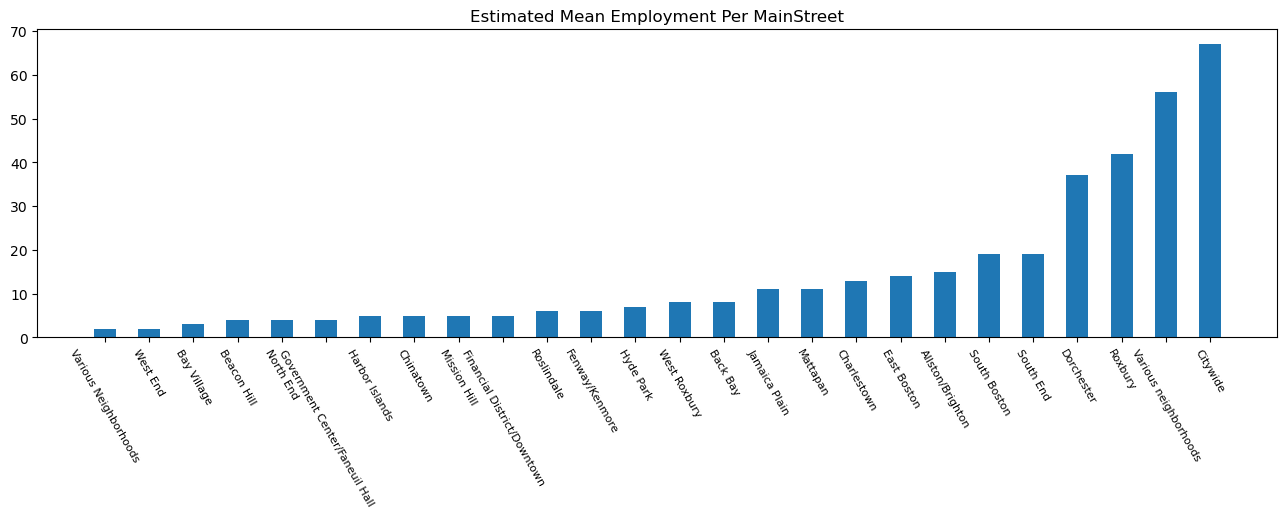

In [46]:
budget_count = budget.groupby(['Neighborhood'])['Total_Project_Budget'].count()
# mean_budget #= budget.reset_index() 
# mean_budget.index
budget_count = budget_count.sort_values(ascending = True)

data = budget_count.values.tolist()
labels = budget_count.index.tolist()
# # print(len(mean_budget))
# # print(labels)

fig = plt.figure(figsize=(16,4))   
plt.bar(range(len(budget_count)), data, width = 0.5, tick_label = labels)
plt.tick_params(axis='x', labelsize=8) 
plt.xticks(rotation=-60) 
plt.title("Estimated Mean Employment Per MainStreet")
plt.show()
